In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint

### Funções

In [2]:
def dCdt(C, t):
    dx = (x_f-x_i)/nodes
    Cal = (Cf + R*C[-1])/(1+R)
    C0 = (Cal*dx*Pe + C[0])/(1 + dx*Pe)
    dCi_dt = []
    dC1_dt = C0*(1/(Pe*dx**2) + (1+R)/(2*dx)) - C[0] * \
        (Da + 2/(Pe*dx**2)) + C[1]*(1/(Pe*dx**2) - (1+R)/(2*dx))
    dCi_dt.append(dC1_dt)
    for i in range(1, nodes-1):
        dCi_dt.append(C[i-1]*(1/(Pe*dx**2) + (1+R)/(2*dx)) - C[i] *
                      (Da + 2/(Pe*dx**2)) + C[i+1]*(1/(Pe*dx**2) - (1+R)/(2*dx)))
    dCn_dt = C[nodes-2]*(1/(Pe*dx**2) + (1+R)/(2*dx)) - \
        C[nodes-1]*(Da + 1/(Pe*dx**2) + (1+R)/(2*dx))
    dCi_dt.append(dCn_dt)
    return dCi_dt


def get_solution(nodes):
    t = np.linspace(0, 10, nodes)
    Ci0 = [0] * nodes
    solution = odeint(dCdt, Ci0, t)
    return solution, t


def get_curve(func, nodes):
    solution, t_graph = func(nodes)
    curve = []
    for sol in solution:
        curve.append(sol[-1])
    return curve, solution[-1], t_graph


### Parâmetros

In [3]:
Pe = 40
Da = 1
R = 0
Cf = 1
Cn = 1  # Valor aleatório para inicialização
x_i = 0
x_f = 1

### Letra A

In [4]:
nodes = 5
solution, t_graph = get_solution(nodes)
print(
    f'Para {nodes} nós se obteve C = {solution[-1][-1]:.4f}.', sep='\n')

nodes = 10
solution, t_graph = get_solution(nodes)
print(
    f'Para {nodes} nós se obteve C = {solution[-1][-1]:.4f}.', sep='\n')

nodes = 50
solution, t_graph = get_solution(nodes)
print(
    f'Para {nodes} nós se obteve C = {solution[-1][-1]:.4f}.', sep='\n')

nodes = 100
solution, t_graph = get_solution(nodes)
print(
    f'Para {nodes} nós se obteve C = {solution[-1][-1]:.4f}.', sep='\n')



Para 5 nós se obteve C = 0.3489.
Para 10 nós se obteve C = 0.3608.
Para 50 nós se obteve C = 0.3730.
Para 100 nós se obteve C = 0.3748.


### Letra B

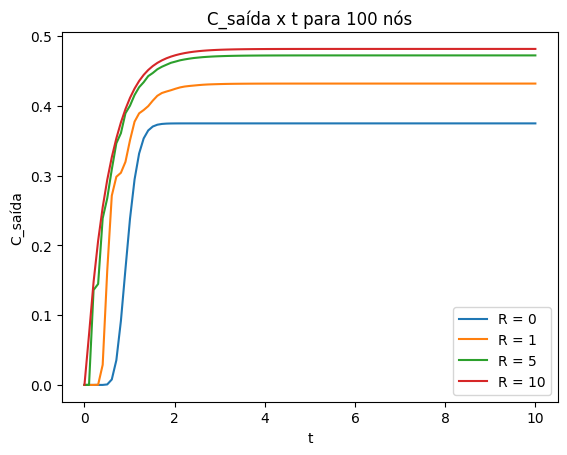

In [5]:
curve, sol_R0, t_graph = get_curve(get_solution, nodes)
plt.plot(t_graph, curve, label='R = 0')

R = 1
curve, sol_R1, t_graph = get_curve(get_solution, nodes)
plt.plot(t_graph, curve, label='R = 1')

R = 5
curve, sol_R5, t_graph = get_curve(get_solution, nodes)
plt.plot(t_graph, curve, label='R = 5')

R = 10
curve, sol_R10, t_graph = get_curve(get_solution, nodes)
plt.plot(t_graph, curve, label='R = 10')

plt.xlabel('t')
plt.ylabel('C_saída')
plt.title('C_saída x t para 100 nós')
plt.legend()
plt.show()

### Letra C

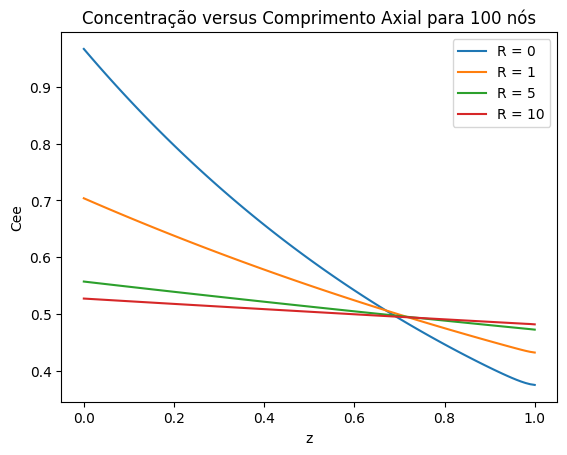

In [6]:
z = np.linspace(0, 1, 100)
plt.plot(z, sol_R0, label='R = 0')
plt.plot(z, sol_R1, label='R = 1')
plt.plot(z, sol_R5, label='R = 5')
plt.plot(z, sol_R10, label='R = 10')
plt.xlabel('z')
plt.ylabel('Cee')
plt.title('Concentração versus Comprimento Axial para 100 nós')
plt.legend()
plt.show()


### Letra D

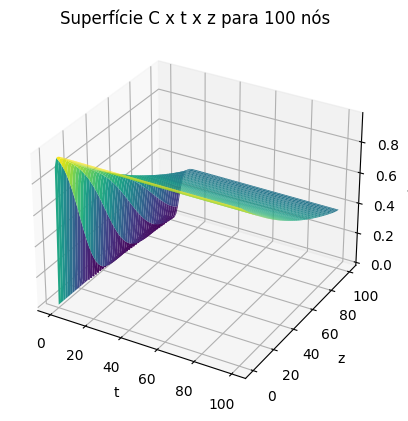

In [7]:
t = np.linspace(0, 100, 100)
z = np.linspace(0, 100, 100)
z_grid, t_grid = np.meshgrid(z, t)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(t_grid, z_grid, solution, cmap='viridis')
ax.set_xlabel('t')
ax.set_ylabel('z')
ax.set_zlabel('C(t,z)')
ax.set_title(
    'Superfície C x t x z para 100 nós')
plt.show()
